# Python - Conceitos básicos - Parte 5

## Tópicos

* Leitura do CSV
* Filtragem e contagem dos carros elétricos
* funcção para separação das tuplas
* Contrução dos gráficos

In [ ]:
!pip install -q matplotlib
from matplotlib import pyplot as plt
import csv

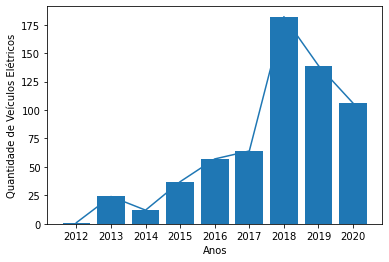

In [ ]:
def obter_dados():
    with open('CarRentalData.csv') as f:
        return [dado_carro for dado_carro in csv.DictReader(f)]

def contar_carros_eletricos_por_ano(dados):
    # o objetivo é conseguir um dicionário
    # nesse formato:
    # {'2015': 100, '2016': 120}
    contador = {}

    for carro in dados:
        if carro['fuelType'] == 'ELECTRIC':
            ano = carro['vehicle.year']

            qtd = contador.get(ano, 0) + 1

            contador.update( {ano: qtd} )

            # print(contador)

    return contador


def pegar_dados_de_lista_de_tuplas(lista_de_dados, posicao):
  valores = []
  for valor in lista_de_dados:
    valores.append(valor[posicao])
  
  return valores


# leu dados do CSV
dados_carros = obter_dados() 

# contamos os carros por ano
carros_eletricos_por_ano = contar_carros_eletricos_por_ano(dados_carros) 

# ordenar os dados para o gráfico
carros_ordenados = sorted(carros_eletricos_por_ano.items())

# separamos os dados em duas listas: tempo e quantidade
anos = pegar_dados_de_lista_de_tuplas(carros_ordenados, 0)
quantidades = pegar_dados_de_lista_de_tuplas(carros_ordenados, 1)

# contruimos um gráfico
plt.xlabel('Anos')
plt.ylabel('Quantidade de Veículos Elétricos')
plt.plot(anos, quantidades)
plt.bar(anos, quantidades)
plt.savefig('carros_eletricos_por_ano.png')